**1990 California Housing Prices Prediction through Machine Learning Algorithms**

Annie Smith and Patrick Dochat

This tutorial examines a data set of housing features and attempts to predict the median house value for a given block. We will be making a multivariate linear regression, a decision tree, and a random forest model, and then evaluate the effectiveness of each.

This dataset is from the 1990 Census in California, although this is not applicable to predicting today’s house prices, it can give valuable insight into the state of California and Housing Prices in general. It allows us to see what areas were higher cost areas to live in, and what features were valued at that time. It also can serve to be translated into today’s housing market. Housing prices have risen everywhere, but an overall idea of what features make a specific house more valuable should still hold today.  It can serve to show an estimate of what people do want in a home, and therefore what corresponds to valuing one house over another. This can also be used today in conjunction with newer  to determine what trends still hold and what deviate from old data. New discoveries in the state, such as California Wildfires, may have changed what homes are valuable, and having this data from 1990 can help to see what features hold the same correlation, versus what have deviated from the past. 
This is also important with respect to data science, because it displays that there is a viable way to predict housing prices in the market in California, which can be expanded to other areas as well. It can be used when determining what price to list a house at, as opposed to trusting a singular person such as a realtor. This can also help to make reliable investments in a house based on specific features, displaying data science can be a vital resource in the real estate industry. 

To understand what factors influence a home's value, this article provides insight and reasoning for variance in value. 
https://www.inman.com/2017/08/07/6-factors-that-influence-a-homes-value/

The factors of location, age, size, location, and neighborhood can be evaluated through the variables found within the dataset. Our analysis will assess the correlation of price with these features.


In [ ]:
!pip install gmaps

In [14]:
from google.colab import output
output.disable_custom_widget_manager()

In [2]:
  # Imports
import pandas as pd 
from pandas.plotting import scatter_matrix

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

import gmaps
import gmaps.datasets

import statsmodels.formula.api

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from  sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.	Here we are going to read in the data from the file Housing.CSV and saving it as the local variable “data”. By Calling “data.head” we can preview the data by seeing the first 5 rows.


In [3]:
  # Reading in the CSV
data = pd.read_csv("housing.csv")
data.head()

longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns]

2.	Calling Data.info allows us to view each of the data types for each of the variables

In [4]:
  # Look at the data types and number of values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


3.	Here we provide a detailed representation of the density of the data at each variable. Some things to note here is that there is increased density of houses at lower latitudes, as well as higher density around 2-5.5 on the median income graph, as well as more inexpensive housing as opposed to high. 

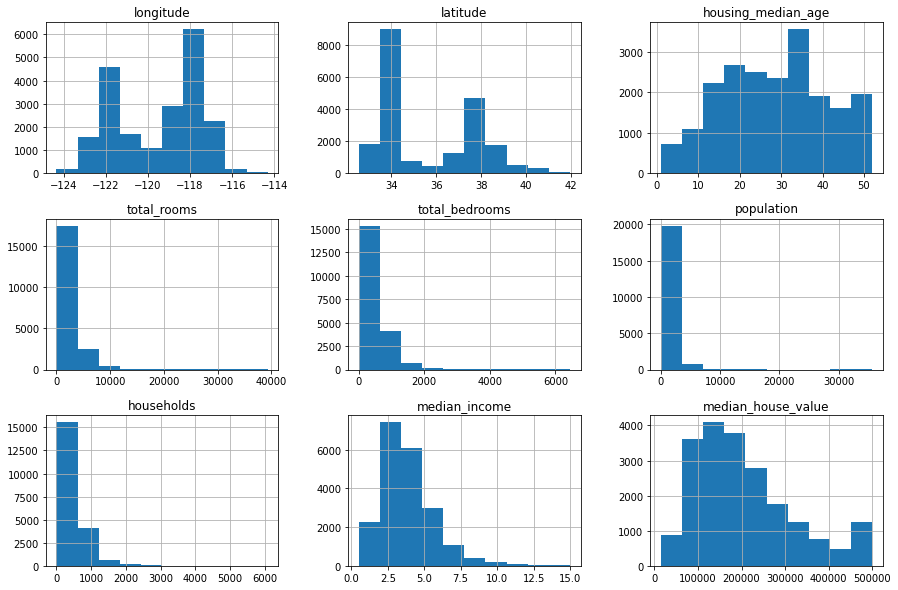

In [5]:
  # Visual representation of a histogram of the given data
data.hist(figsize = (15,10))
plt.show()

4.	We want to further investigate the median household value, and eventually predict this value. We call “plt.hist” on the median house value variable and we want to see more bins so we expand that. We will also add a line depicting the mean and the median. Something to note here is that the mean is higher than the median house value. Showing that there are more outliers in price towards the higher end of the range as opposed to the lower.

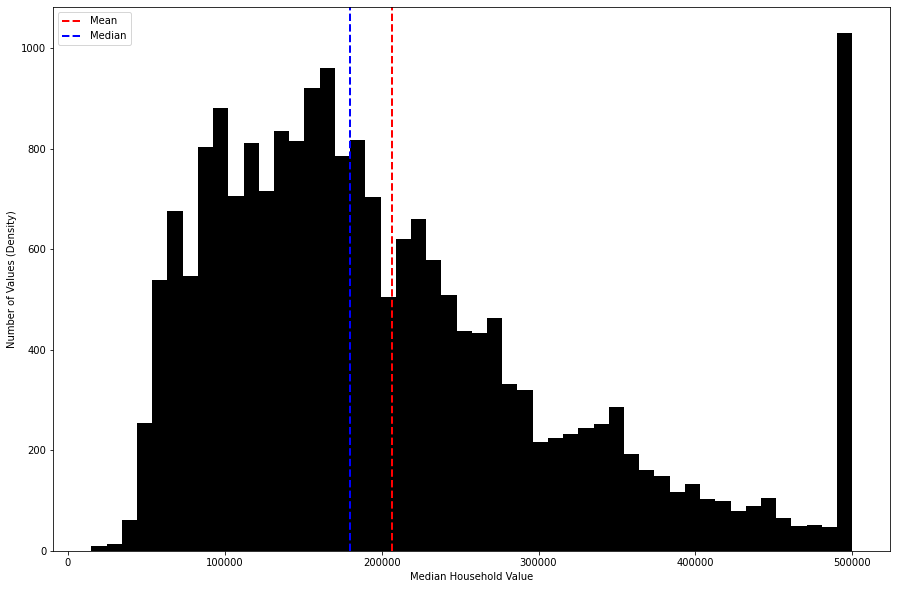

In [6]:
  # Close up on the Median Household Value Histogram (What we are trying to end up predicting)
plt.figure(figsize = (15,10))
n, bins, patches = plt.hist(data['median_house_value'], bins = 50, 
                            color ='black')
  # Measures of Central Tendency
plt.axvline(data['median_house_value'].mean(), c = 'red', linestyle='dashed', linewidth=2,\
            label='Mean')
plt.axvline(data['median_house_value'].median(), c = 'blue', linestyle='dashed', linewidth=2,\
            label='Median')
  # Graph Labels
plt.legend()
plt.xlabel("Median Household Value")
plt.ylabel("Number of Values (Density)")
plt.show()

5.	We will call data.describe in order to see various statistical summaries of each variable, such as the mean, standard variation, as well as different percentile values. 

In [7]:
  # Given within the information on the spreadsheet, but provides insight into the graphs
data.describe()

longitude      latitude  ...  median_income  median_house_value
count  20640.000000  20640.000000  ...   20640.000000        20640.000000
mean    -119.569704     35.631861  ...       3.870671       206855.816909
std        2.003532      2.135952  ...       1.899822       115395.615874
min     -124.350000     32.540000  ...       0.499900        14999.000000
25%     -121.800000     33.930000  ...       2.563400       119600.000000
50%     -118.490000     34.260000  ...       3.534800       179700.000000
75%     -118.010000     37.710000  ...       4.743250       264725.000000
max     -114.310000     41.950000  ...      15.000100       500001.000000

[8 rows x 9 columns]

6.	We have missing values scattered throughout the total_bedroom variable column. In order to further clean the data, we will use mean imputation in order to fill these empty values. First, we calculate the mean value and wherever it is NA in the column we impute ‘mean’.

In [8]:
  # total_bedrooms is missing values, but no missing data besides this
  # additionally, the values given are data=data.dropna() to decrease 
  # rows or replace with central tendency
mean = data["total_bedrooms"].mean()
data['total_bedrooms'] = data["total_bedrooms"].fillna(mean)
data.describe()

longitude      latitude  ...  median_income  median_house_value
count  20640.000000  20640.000000  ...   20640.000000        20640.000000
mean    -119.569704     35.631861  ...       3.870671       206855.816909
std        2.003532      2.135952  ...       1.899822       115395.615874
min     -124.350000     32.540000  ...       0.499900        14999.000000
25%     -121.800000     33.930000  ...       2.563400       119600.000000
50%     -118.490000     34.260000  ...       3.534800       179700.000000
75%     -118.010000     37.710000  ...       4.743250       264725.000000
max     -114.310000     41.950000  ...      15.000100       500001.000000

[8 rows x 9 columns]

7.	Here we are looking at Ocean proximity, which shows a breakdown of how many houses fit into each category. Since it is an object, it has not been represented previously in analysis.

In [9]:
  # Allows us to see the different values included in the object,
  # and also ensure no missing data in the object
print(data.groupby('ocean_proximity').size())
data['ocean_proximity'].size

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64


20640

8.	We can show this same data in a histogram, which provides a different way of looking at it.

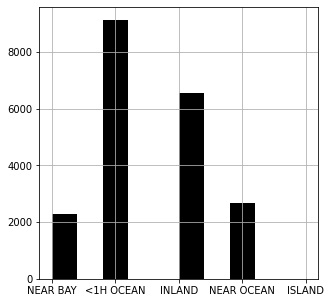

In [10]:
  # Shows density of the given values
data['ocean_proximity'].hist(figsize = [5,5], color = 'black')

9.	Here we will also view the houses based on latitude and longitude as a scatterplot, which gives us an interesting distribution of houses.

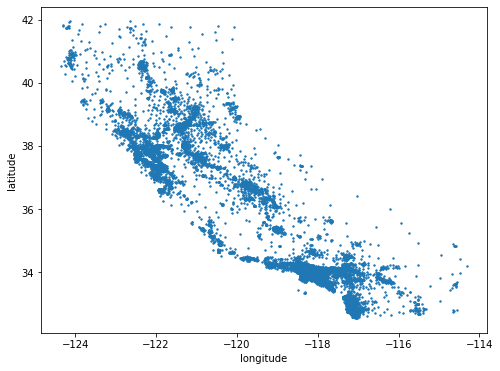

In [11]:
  # Basic graph of where the houses are placed
data.plot.scatter(x='longitude',y='latitude',s=2,figsize=(8,6))

10.	Here we show a heat map of the same data but with the added value attached to it. We can see the spots of yellow increase (high housing values) as you get closer to the edge of the water, which we will take note of for later. 

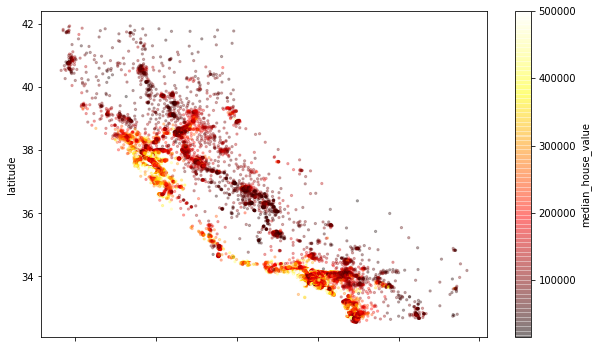

In [12]:
  # Can see the density of where houses with high values are
data.plot(kind='scatter',x='longitude',y='latitude',alpha=0.3,
            s= 5 ,figsize=(10,6),
            c="median_house_value",cmap='hot',colorbar=True)
plt.show()

In [34]:
from google.colab import output
output.enable_custom_widget_manager()

11.	We have another further look into the median house value by latitude and longitude overlayed on the map of the state. This provides clarity on the claim above about the increase in prices as we get closer to the water. In addition, this allows us to see the cluster of increased values also occur in cities such as San Fransisco and Los Angeles.

In [35]:
  # Makes a heatmap in a more visually appealing way, you can see the cities are the areas
heatmap_data = {'values': data['median_house_value'], 'latitude': data['latitude'], 'longitude' : data['longitude']} 
df = pd.DataFrame(data=heatmap_data) 
locations = df[['latitude', 'longitude']]
weights = df['values']
fig = gmaps.figure() 
heatmap_layer = gmaps.heatmap_layer(locations, weights=weights) 
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

12.	We call scatter matrix which provides us a multi graph of many scatter plots, with each combination of the variables. Across the diagonal, this is where the variables are the same, so it is not a correlation we want to look at. Some things provide insight, like the median house value by median income graph. You can see that there is a slight upward trend as income increases, house value increases. Another interesting trend we noticed was that when median age increases, the number of total bedrooms decreases. The correlation between median age and median income is densely populated around 5-10 thousand in income across the whole age groups, with many outliers along the way. 

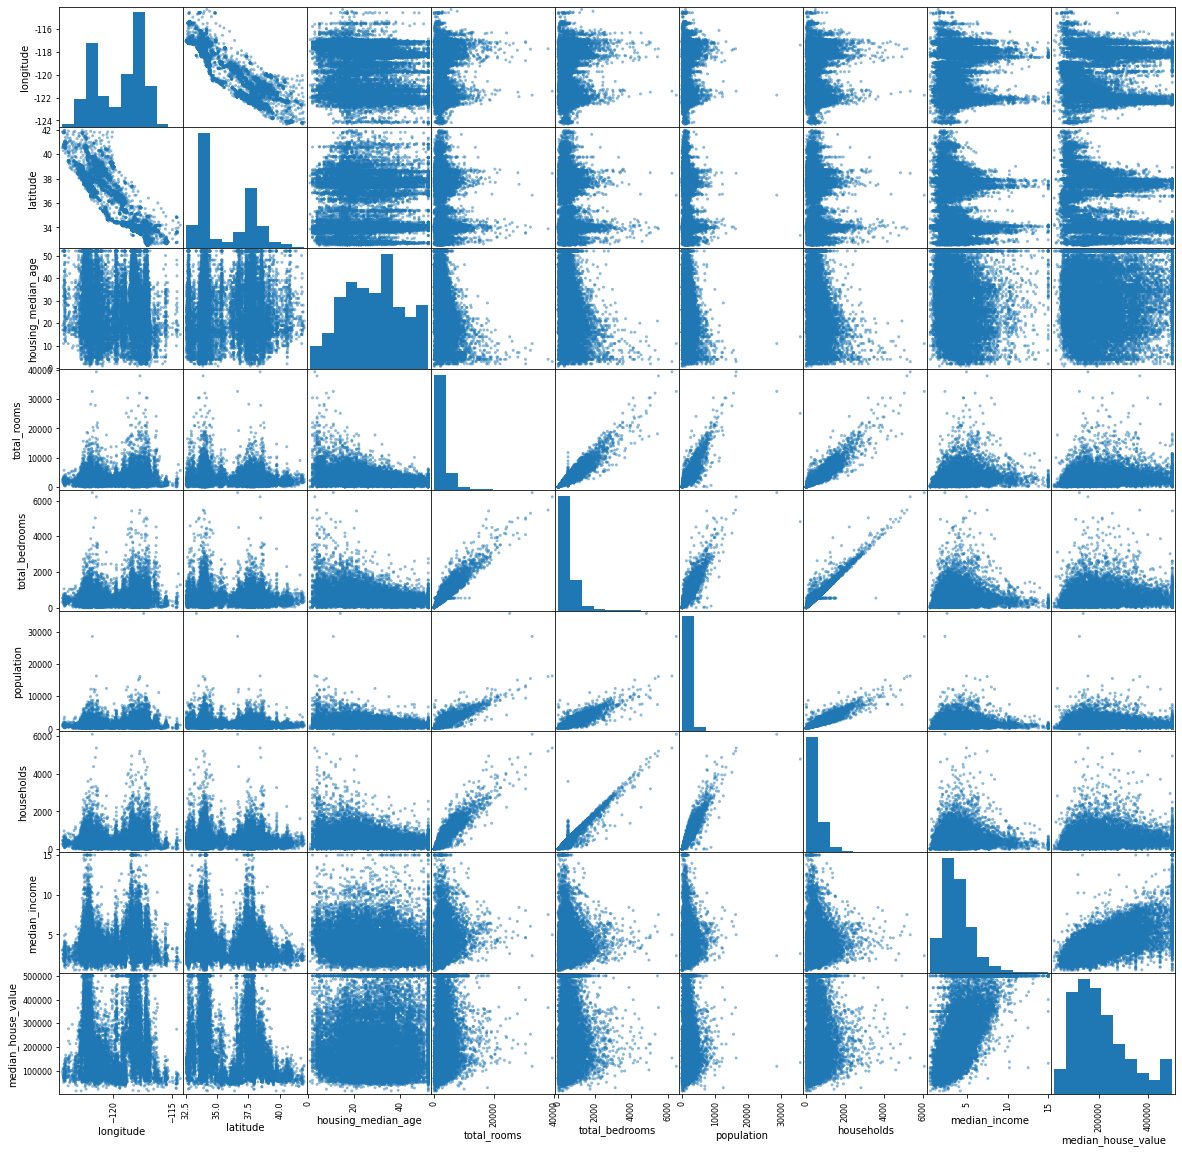

In [16]:
  # Really looking at correlation with housing income but looking for multicollinearity as well
  # to make sure it does not skew the data
correlation = scatter_matrix(data, figsize = (20,20), alpha=0.5);

13.	We want to make further make sense of these many scatter plots so we will make a heat map showing the correlations. We looked for objects that are highly correlated so that we can further analyze. Variables that are correlated (positively or negatively) with median house value are Household median age, total income, and median income. Other things that are correlated heavily are total_bedrooms and total_rooms, and households and population. 

  We also want to see if there is multicollinearity (independent variables are correlated with each other) to make sure we fix this so that the data is not skewed. If you want to learn more about multicollinearity, you can read about it at https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-multiple-regression/multicollinearity.html.

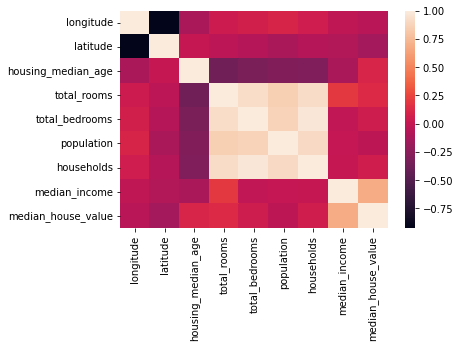

In [17]:
  # Heat map of the correlations between the variables
no_object_data = data.drop(['ocean_proximity'], axis=1, inplace = False)
sns.heatmap(no_object_data.corr())
plt.show()

14.	We want to combine some of these heavily correlated values because when you have multicollinearity it undermines the statistical significance of the independent variables at hand. We combine total bedrooms and total rooms by dividing the values and do the same with household and population. Also we are doing one hot encoding with the ocean_proximity variable in order to prepare for the models later. We want to take the current variable values and convert them to a numerical value in order to determine the relationship between ocean proximity and median household value. We then concatenate these binary values to the end of our data frame. 

In [18]:
  # Here is where we combine some because of their high multicollinearity, and drop other columns
data['total_bedrooms/total_room'] = data['total_bedrooms']/data['total_rooms'] 
data['households/population'] = data['households']/data['population']
data = pd.concat([data,pd.get_dummies(data["ocean_proximity"],prefix='proximity')], axis = 1)
data_pred = data.drop(['ocean_proximity'], axis=1, inplace = False)

16.	We now want to look at our correlations in a numerical way against median house value. We do this by calling data_pred.corr() and sort it to see most correlated to least. Prox_inland, total_bedrooms/total_room and latitude are the most negatively correlated; Median income, households/population and proximity <1H are the most positively correlated. We will choose these for our testing and training of models. 

In [19]:
  # Correlations with the dependent variable
data_pred.corr()['median_house_value'].sort_values()

proximity_INLAND            -0.484859
total_bedrooms/total_room   -0.220049
latitude                    -0.144160
longitude                   -0.045967
population                  -0.024650
proximity_ISLAND             0.023416
total_bedrooms               0.049454
households                   0.065843
housing_median_age           0.105623
total_rooms                  0.134153
proximity_NEAR OCEAN         0.141862
proximity_NEAR BAY           0.160284
proximity_<1H OCEAN          0.256617
households/population        0.264910
median_income                0.688075
median_house_value           1.000000
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feae6084710>,
      dtype=object)

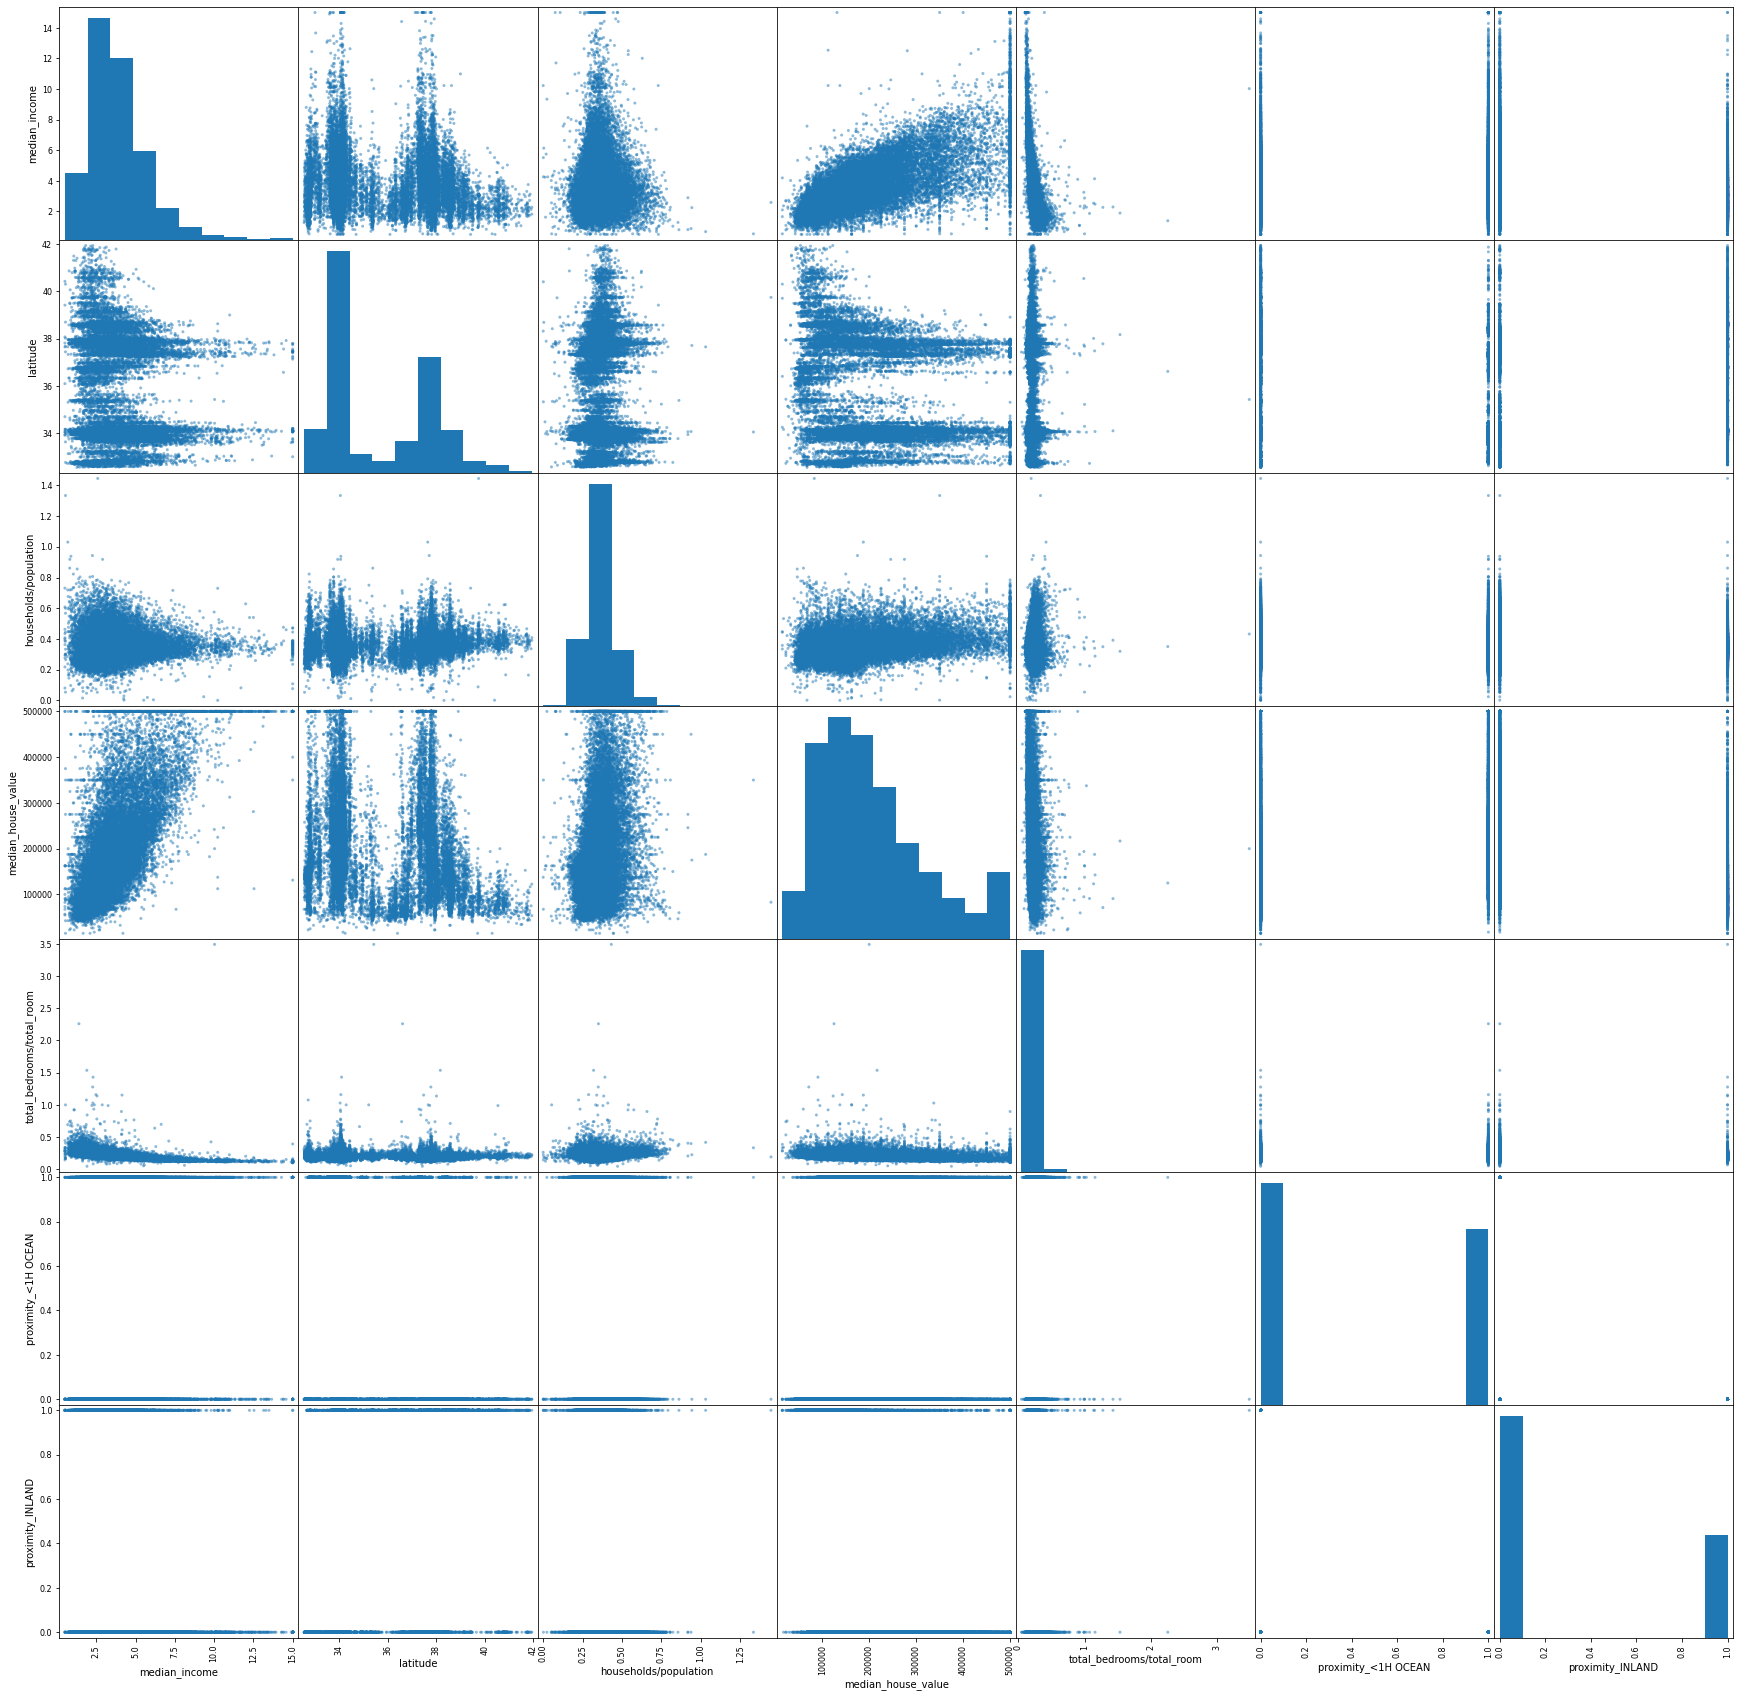

In [20]:
  # After looking. at correlations with median household values, can simplify what
  # variables are being used, to get a larger picture 
scatter_matrix(data_pred[['median_income', 'latitude', 'households/population', 'median_house_value', 'total_bedrooms/total_room', 'proximity_<1H OCEAN', 'proximity_INLAND']], figsize = (30,30), alpha=0.5)

In [21]:
  # Simplifies the dataset
data_pred = data_pred[['median_income', 'latitude', 'households/population', 'median_house_value', 'total_bedrooms/total_room', 'proximity_<1H OCEAN', 'proximity_INLAND']]

We will now use the simplified dataset in order to make machine learning models that can predict the housing value. 

**LINEAR REGRESSION** -- use the 6 variables to determine a linear relationship between the independent variables and the house price.

In [22]:
y = data_pred['median_house_value']
X = data_pred[['median_income', 'latitude', 'households/population', 'total_bedrooms/total_room', 'proximity_<1H OCEAN', 'proximity_INLAND']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train) 

LinearRegression()

17.	Here we are going to look at the Fold Cross Value Score of our Linear Regression Model. as you can see we put 5 splits and it turned out to be 65% accurate. But the regression model only turned out to be 63% accurate. This is not as accurate of a model as we would like. 

In [23]:
folds = KFold(n_splits = 5, shuffle = True)

  # You can also directly set a cross value to a specific integer intead
  # of using Kfold
scores = cross_val_score(linear_regression, x_train,\
                        y_train, scoring = 'r2',\
                         cv = folds)

print(f'5 Fold Cross Value Score:\
 {scores}, {(scores.mean()*100)}%')
print(f'Linear Regression Model Accuracy: {linear_regression.score(x_test, y_test)*100}%')

5 Fold Cross Value Score: [0.63416809 0.6748682  0.63740235 0.65163306 0.61217578], 64.20494976529596%
Linear Regression Model Accuracy: 65.33659843488103%


18.	 Here is a visual representation of actual vs predicted values of the model

Text(0.5, 1.0, 'Test Accuracy')

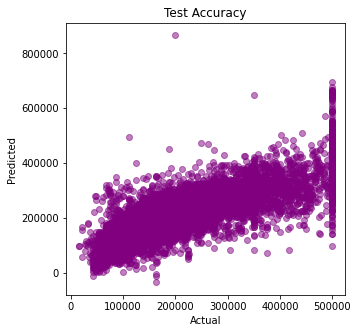

In [24]:
plt.figure(figsize = (5,5))
plt.scatter(y_test, linear_regression.predict(x_test) ,c = 'purple', alpha = 0.5 )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Accuracy')

19.	We calculate the residuals, which is the absolute value of the difference shown above. You can see it gets lower and lower as you move along the x axis, displaying most values have low error.

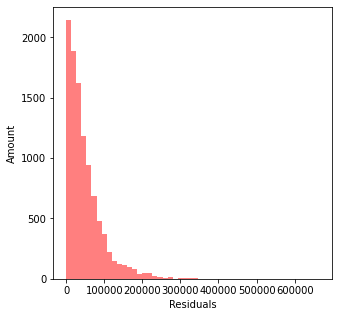

In [25]:
residualsreg = abs(linear_regression.predict(x_test) - y_test) 
plt.figure(figsize = (5,5))
plt.xlabel('Residuals')
plt.ylabel("Amount")
n, bins, patches = plt.hist(residualsreg, bins = 50, 
                            color ='red', alpha = 0.5)

**DECISION TREE** -- each node evaluates a certain feature, and then will split it off into two categories, until it is able to classify the value given. 

20.	We now move onto the decision tree model to see if we can get a more accurate prediction. We use median income as a criterion as well as proximity inland. 

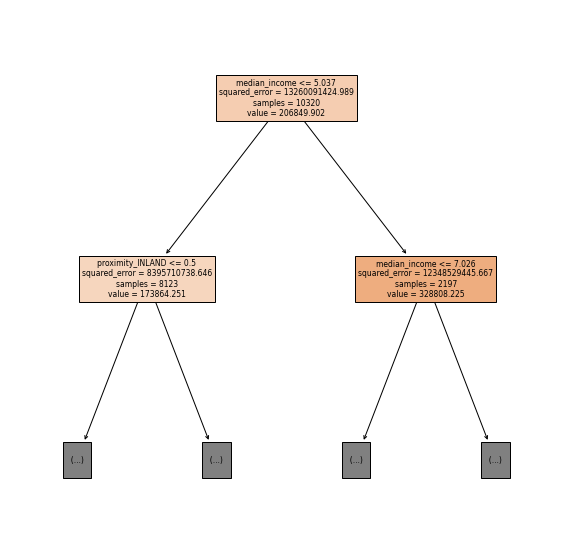

In [26]:
  # Visualizing one decision tree: 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(decision_tree ,max_depth=1,feature_names=x_train.columns, filled=True)
plt.show()

21.	We check the cross-value score of this model, and it is lower than the regression with a score of 51%. And the decision tree showed to be only 51% accurate as well. 

In [27]:
scores = cross_val_score(decision_tree, x_train, y_train, cv = 5)
print(f'5 Fold Cross Value Score:\
 {scores}, {(scores.mean()*100)}%')
print(f'Decision Tree Model Accuracy: {decision_tree.score(x_test,y_test)*100}%')

5 Fold Cross Value Score: [0.49167443 0.48789129 0.48877069 0.50471109 0.48443393], 49.149628673979784%
Decision Tree Model Accuracy: 54.168841186628924%


22.	Here is a visual representation of actual vs predicted values and you can see its more sporadic than the previous model. 

Text(0.5, 1.0, 'Test Accuracy')

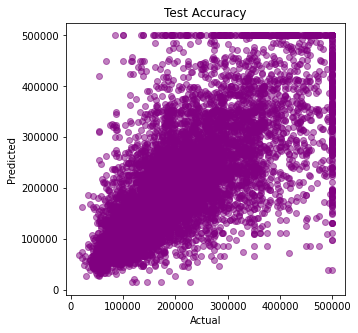

In [28]:
plt.figure(figsize = (5,5))
plt.scatter(y_test, decision_tree.predict(x_test) ,c = 'purple', alpha = 0.5 )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Accuracy')

23.	Residual graph as done before

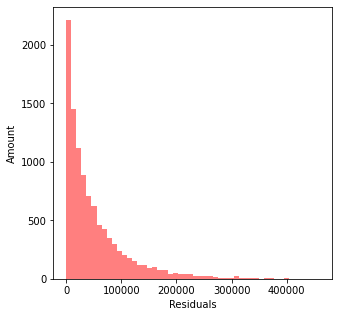

In [29]:
residualstree = abs(decision_tree.predict(x_test) - y_test) 
plt.figure(figsize = (5,5))
plt.xlabel('Residuals')
plt.ylabel("Amount")
n, bins, patches = plt.hist(residualstree, bins = 50, 
                            color ='red', alpha = 0.5)

**RANDOM FOREST** -- creates and merges multiple decision trees into one 'forest'.
The decision of whether to use a decision tree or a random forest is described in greater detail at : https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/ . But we will see that collective decision making is more effective here.

24.	The last model we look at is the Random Forest

25.	We will use 150 estimators as well as a 5-fold cross value score. The 5-Fold score was 74.85% accurate, and the overall model accuracy was 74.64% accurate. Much higher than the previous two models. 

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
forest = RandomForestRegressor(n_estimators = 150)
forest.fit(x_train, y_train)

scores = cross_val_score(forest, x_train, y_train, cv = 5)
print(f'5 Fold Cross Value Score:\
 {scores}, {(scores.mean()*100)}%')
print(f'RandomForest Model Accuracy: {forest.score(x_test,y_test)*100}%')

5 Fold Cross Value Score: [0.7511863  0.70725352 0.73380261 0.73223855 0.76310235], 73.75166654786265%
RandomForest Model Accuracy: 75.1603927074213%


Text(0.5, 1.0, 'Test Accuracy')

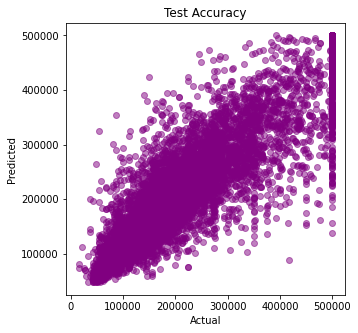

In [31]:
plt.figure(figsize = (5,5))
plt.scatter(y_test, forest.predict(x_test) ,c = 'purple', alpha = 0.5 )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Accuracy')

26.	Again, we show the residuals, and we see that it is much tighter than before. 

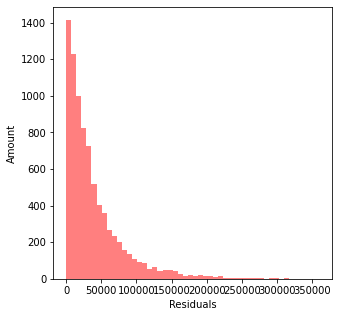

In [32]:
residualsforest = abs(forest.predict(x_test) - y_test) 
plt.figure(figsize = (5,5))
plt.xlabel('Residuals')
plt.ylabel("Amount")
n, bins, patches = plt.hist(residualsforest, bins = 50, 
                            color ='red', alpha = 0.5)

27. To provide more contect, we plotted all residuals along the same below. Based on the fact that the Random Forest has the highest number of close to zero error, it verifies the random forest model being the most accurate. 

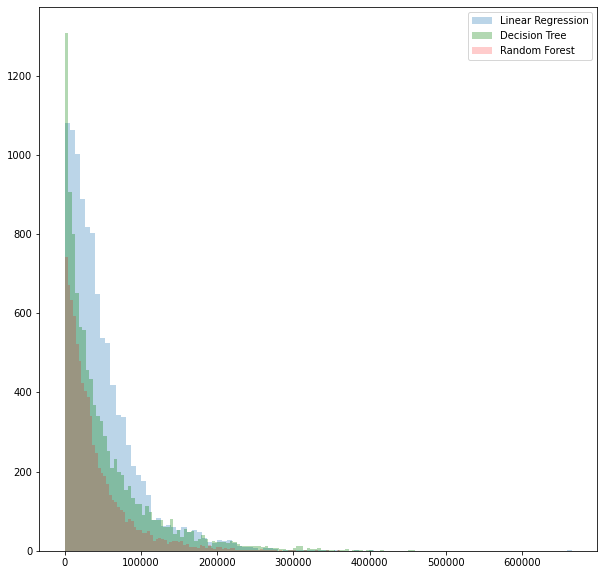

In [33]:
  # Put this together and plot residuals in combination with the three methods tested
plt.figure(figsize=(10,10))
plt.hist(residualsreg, bins=100, alpha=0.3, label="Linear Regression")
plt.hist(residualstree, bins=100, alpha=0.3, label="Decision Tree" , color = 'green')
plt.hist(residualsforest, bins=100, alpha=0.2, label="Random Forest" , color = 'red')
plt.legend(loc = 'upper right')
plt.show()

The purpose of this Tutorial was to try to predict median house value based on other variables such as median income, latitude, number of households and population, total rooms, and proximity to water. We could see that some factors had a strong determination of house value. We used these six variables: 'median_income', 'latitude', 'households/population', 'median_house_value', 'total_bedrooms/total_room', 'proximity_<1H OCEAN', 'proximity_INLAND'.  These proved to be correct through the correlation heat maps and model scores. This aligns withe the article written above about the location , neighborhoods, size, and age being factors, as they were all the most correlated and what we ended up using as independent variables. 

We used what we determined to be the important variables in order to build the models that we did. To our surprise, the linear regression model did the worst overall. This is surprising because we are predicting values that are continuous in nature. The random forest model actually proved to be the best predictor as it almost hit 75% accuracy.

Based on the models that we built, you could use this on a newer dataset in order to predict current house values with great accuracy. This shows that with the proper use of applied data you can make informed decisions and predictions in the real world. This tutorial is testament to the expansion of data science for practical use and shows tangible evidence of its versatility. 

Adding in data overtime could also allow for the possibility of prediction fluctuations in the housing market overtime, which has great importance. More information on that can be researched here: https://www.opendoor.com/w/blog/factors-that-influence-home-value .

The last three factors: the local market, economic indicators, and interest rates could not be discussed with the features given here, but data on that can provide more insight to housing prices, especially when looking over time.